## 라이브러리 로딩

In [48]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 불러오기

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 간단한 EDA

In [50]:
# train 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 13개 변수를 가집니다.
train.head()

index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol   type  
0  0.99432  3.44       0.44     10.2  white  
1  0.99690  3.19       0.59      9.5    red  
2  0.99176  3.05       0.52     10.9  white  
3  0.99390  3.26       0.50     10.8  white  
4  0.99550  3.04       0.43     10.9  white

In [51]:
# test 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 12개 변수를 가집니다.
# train 중 quality 변수가 사라졌습니다.
test.head()

index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0            9.0              0.31         0.48             6.6   
1      1           13.3              0.43         0.58             1.9   
2      2            6.5              0.28         0.27             5.2   
3      3            7.2              0.15         0.39             1.8   
4      4            6.8              0.26         0.26             2.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.043                 11.0                  73.0  0.99380  2.90   
1      0.070                 15.0                  40.0  1.00040  3.06   
2      0.040                 44.0                 179.0  0.99480  3.19   
3      0.043                 21.0                 159.0  0.99480  3.52   
4      0.019                 23.5                  72.0  0.99041  3.16   

   sulphates  alcohol   type  
0       0.38     11.6  white  
1       0.49      9.0    red  
2       0.69      9.4  white  
3       0.47     10.0  white  
4       0.47     11.8  white

In [52]:
# train 데이터의 열 별 정보를 살펴봅니다.
# 결측치는 없습니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


<Axes: >

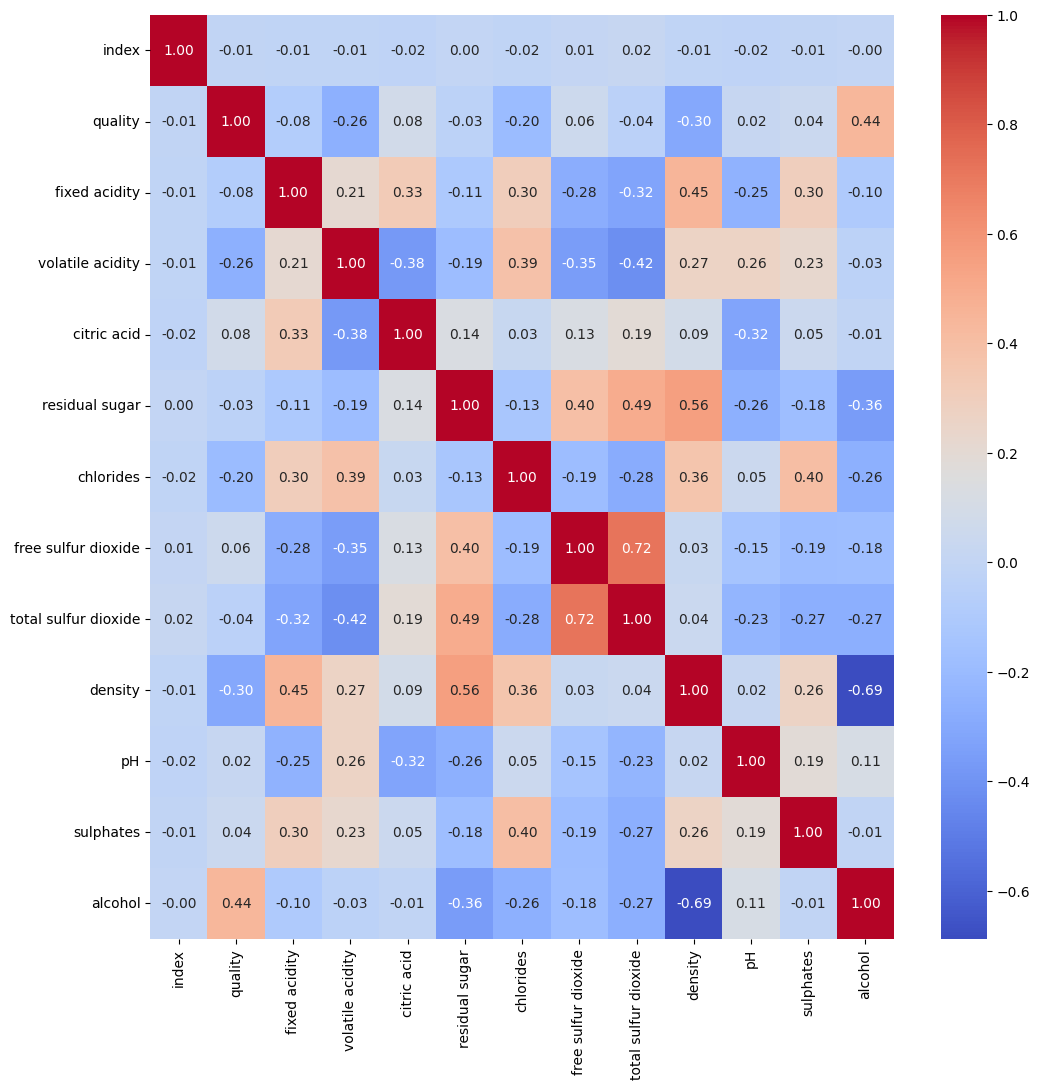

In [53]:
# train의 변수 간 상관관계를 살펴봅니다.
import numpy as np

numeric_train = train.select_dtypes(include=[np.number])
plt.figure(figsize=(12,12))
sns.heatmap(data=numeric_train.corr(), annot=True, fmt=".2f", cmap="coolwarm")

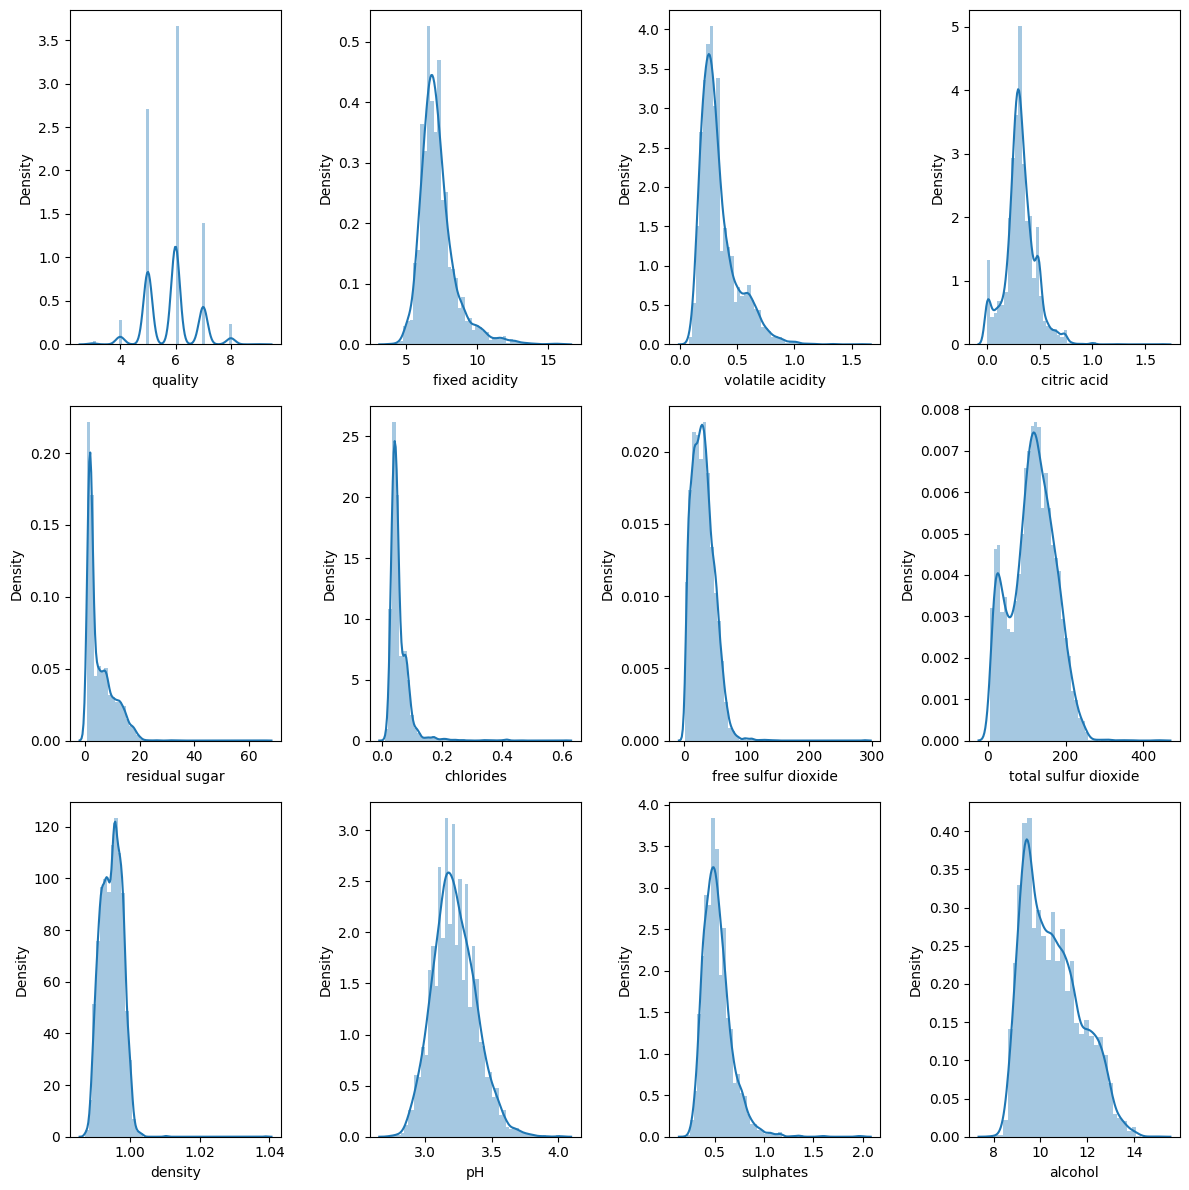

In [54]:
# train의 각 변수별 분포를 살펴봅니다.
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

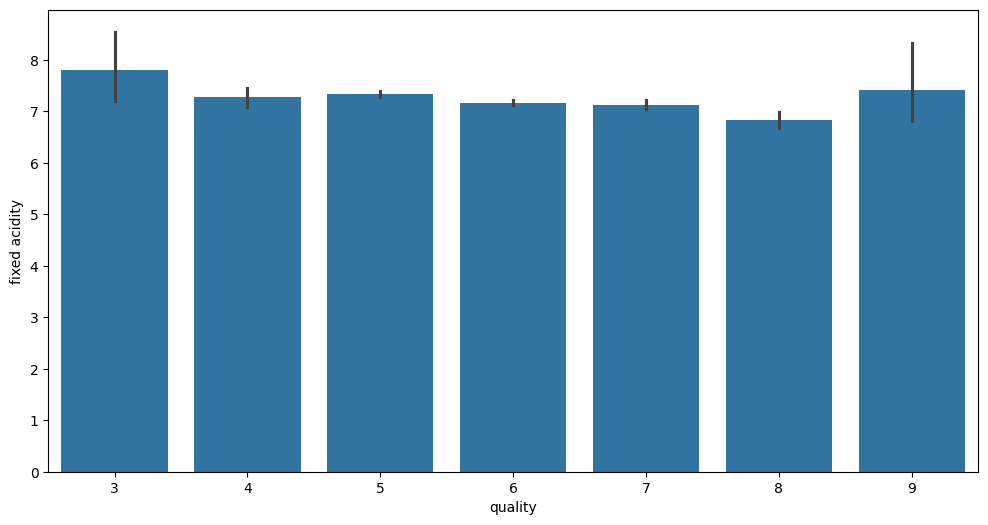

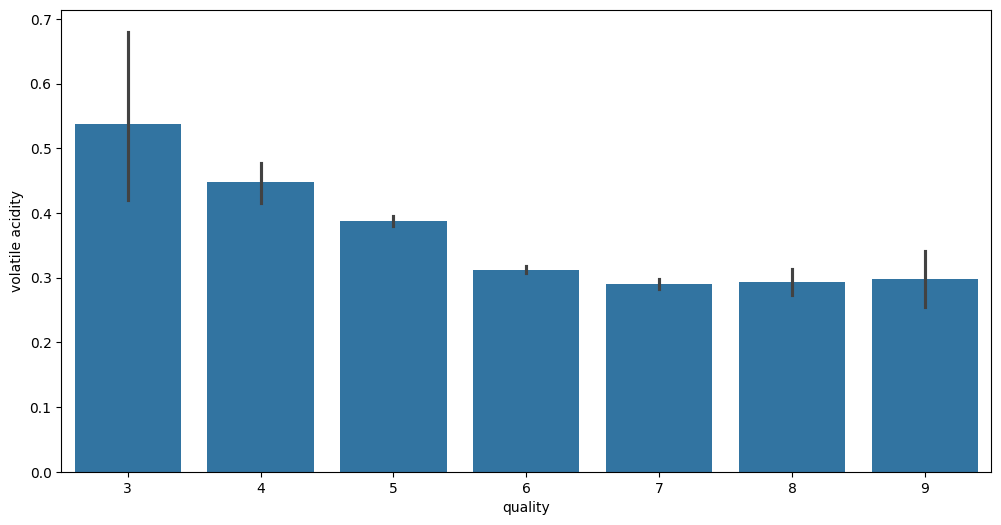

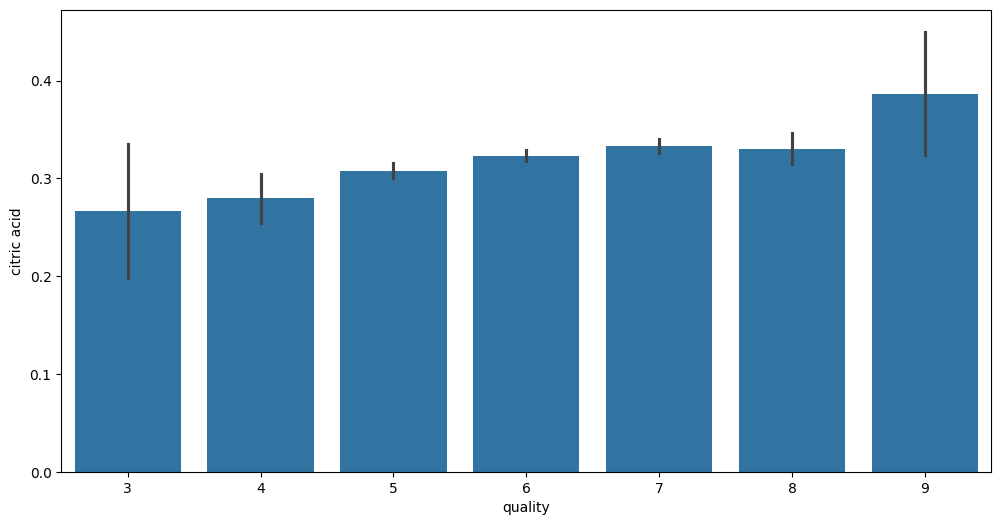

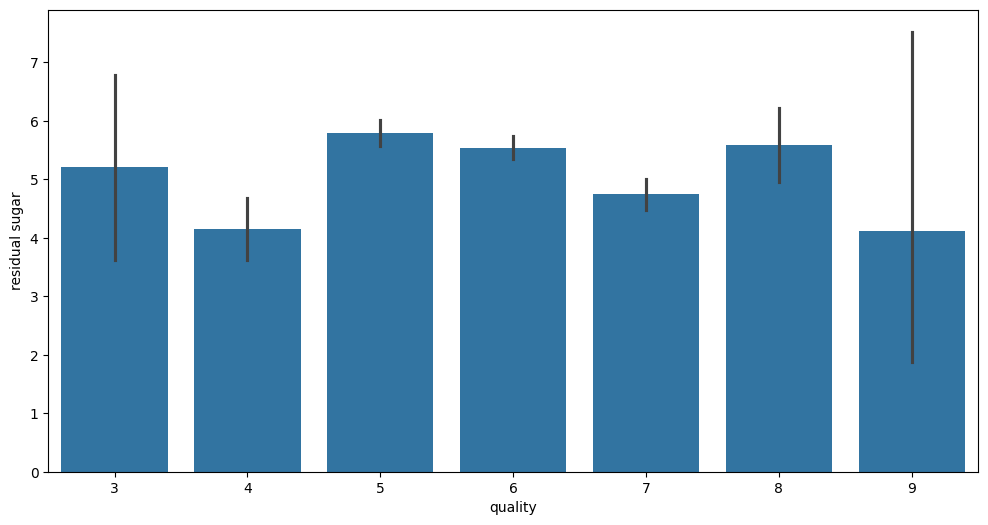

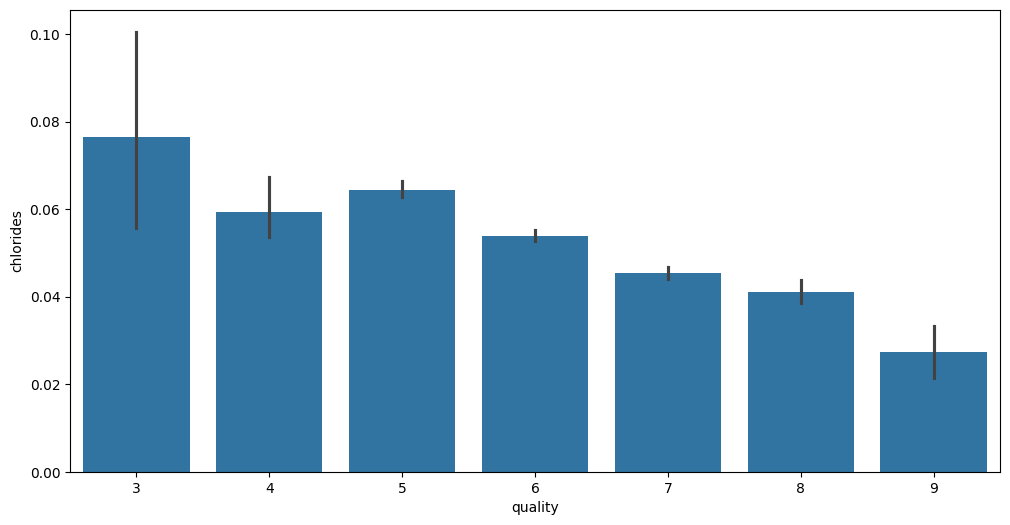

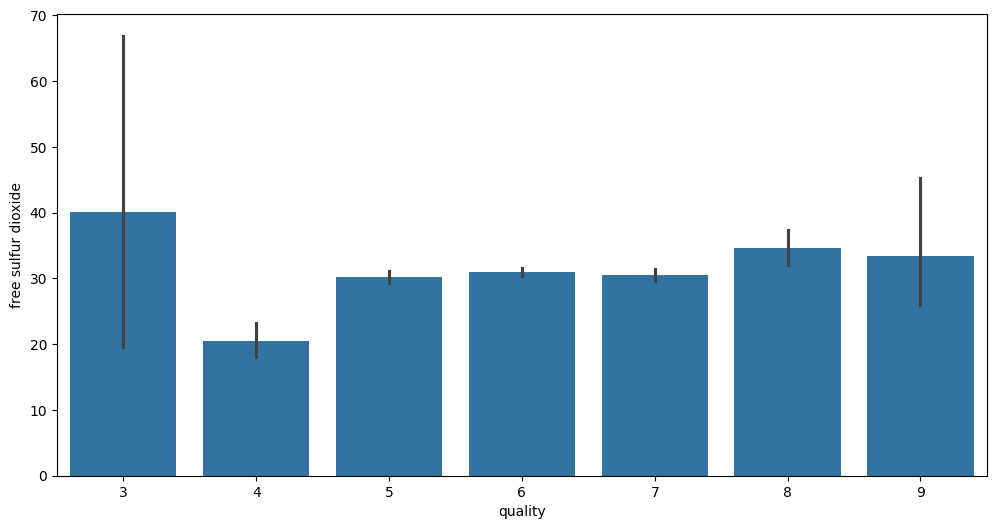

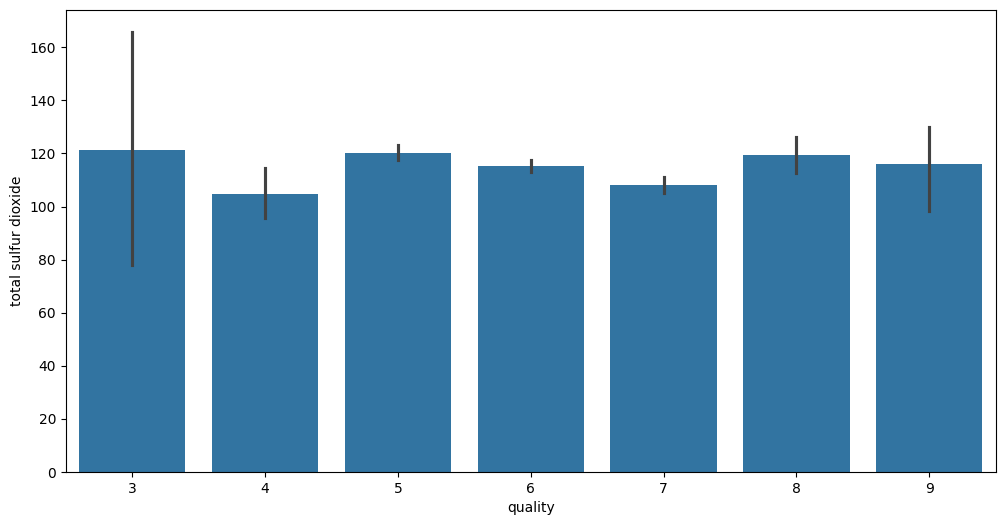

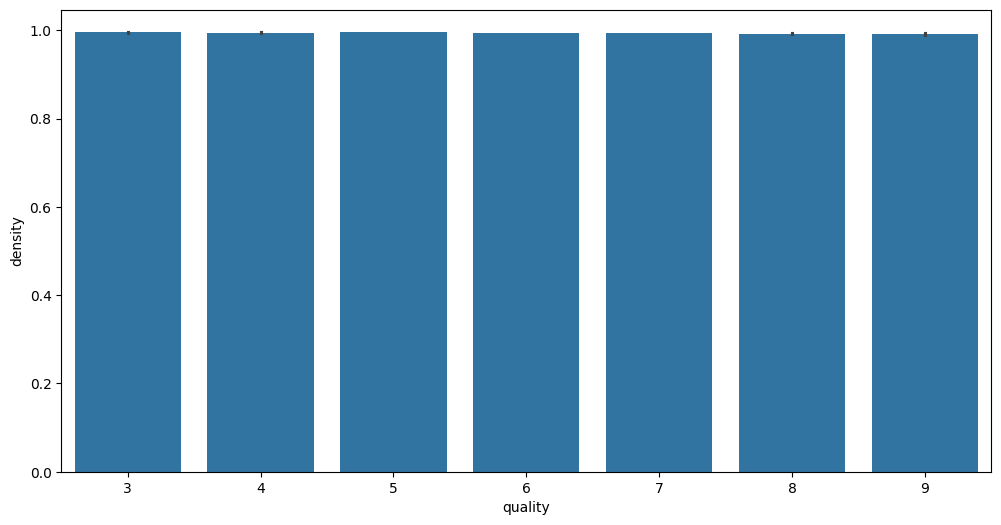

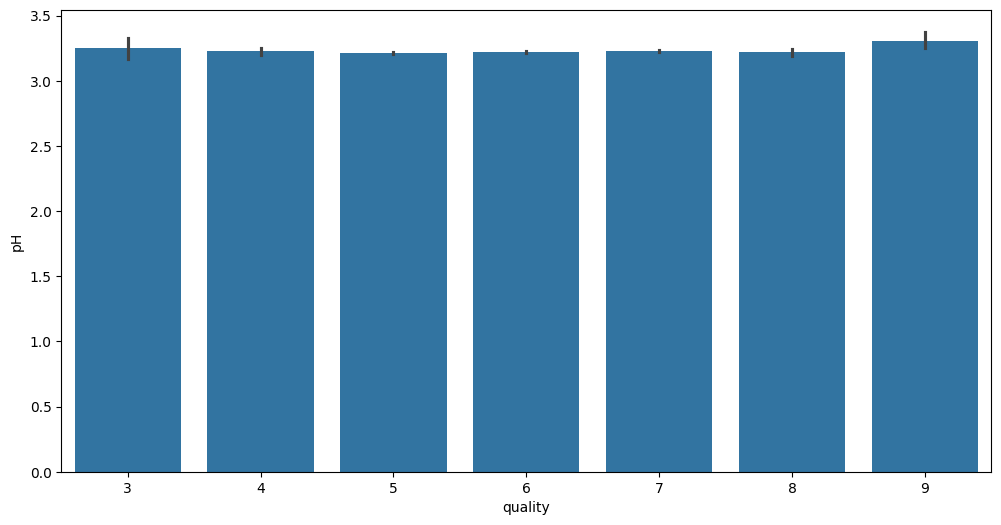

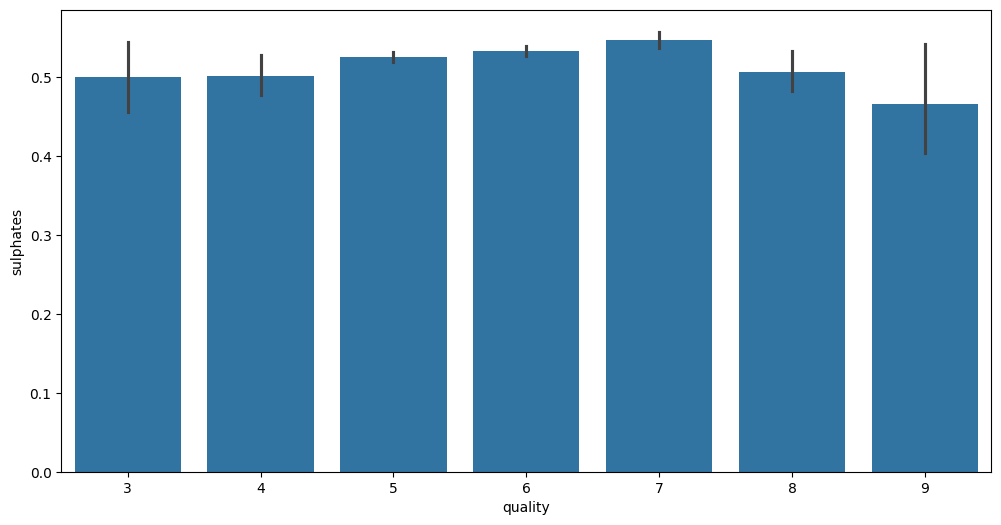

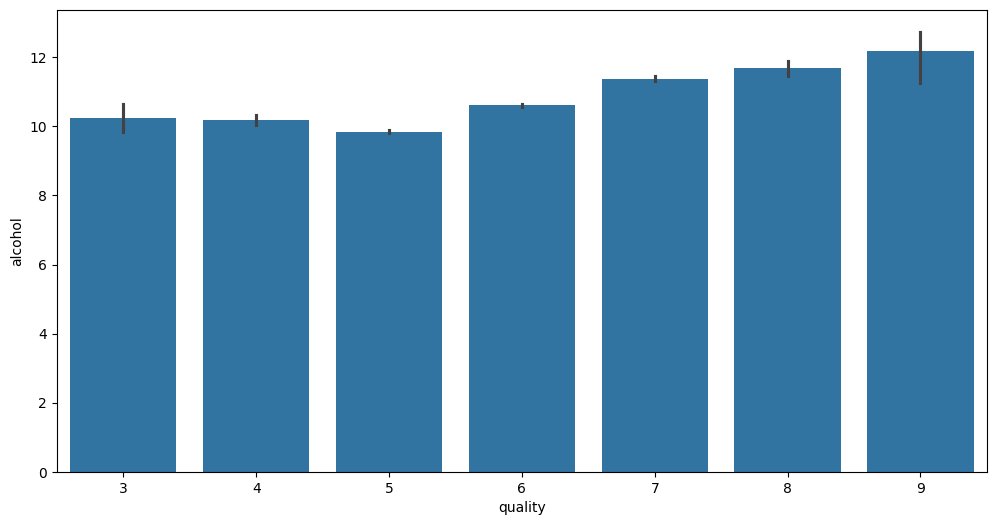

In [55]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

## 데이터 전처리

In [56]:
# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [57]:
train.head()

index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol  type  
0  0.99432  3.44       0.44     10.2     1  
1  0.99690  3.19       0.59      9.5     0  
2  0.99176  3.05       0.52     10.9     1  
3  0.99390  3.26       0.50     10.8     1  
4  0.99550  3.04       0.43     10.9     1

In [58]:
# 불필요한 변수 제거
train_x = train.drop(['index', 'quality'], axis = 1)
train_y = train['quality']
test_x = test.drop('index', axis = 1)

In [59]:
train_x.shape, train_y.shape, test_x.shape

((5497, 12), (5497,), (1000, 12))

## 모델링 진행

In [60]:
from sklearn.ensemble import RandomForestClassifier
# 모델 선언
model = RandomForestClassifier()

#모델 학습
model.fit(train_x, train_y)

RandomForestClassifier()

In [61]:
# 학습된 모델로 test 데이터 예측
y_pred = model.predict(test_x)

## 제출 파일 생성


In [62]:
submission = pd.read_csv('sample_submission.csv')

In [63]:
submission['quality'] = y_pred

In [64]:
submission

index  quality
0        0        6
1        1        6
2        2        6
3        3        5
4        4        6
..     ...      ...
995    995        6
996    996        5
997    997        5
998    998        6
999    999        6

[1000 rows x 2 columns]

In [65]:
# csv 파일로 저장합니다.
submission.to_csv('baseline.csv', index=False)

In [66]:
# ====== 라이브러리 ======
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# ====== 데이터 로딩 ======
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

# ====== 전처리: type 인코딩(누수 방지 위해 합쳐서 fit) ======
enc = LabelEncoder()
enc.fit(pd.concat([train['type'], test['type']], axis=0))
train['type'] = enc.transform(train['type'])
test['type']  = enc.transform(test['type'])

# ====== 피처/타깃 분리 ======
X = train.drop(['index', 'quality'], axis=1)
y = train['quality']
X_test = test.drop(['index'], axis=1)

# ====== (선택) 탐색 전용 서브샘플로 더 가볍게 ======
# 데이터가 크면 아래 비율을 0.5~0.7 정도로 줄이면 탐색 속도가 확 빨라짐.
SUBSAMPLE_FRAC = 0.65  # 필요 없으면 1.0으로 두세요
if SUBSAMPLE_FRAC < 1.0:
    sss = StratifiedShuffleSplit(n_splits=1, test_size=(1.0 - SUBSAMPLE_FRAC), random_state=42)
    tr_idx, _ = next(sss.split(X, y))
    X_search = X.iloc[tr_idx].reset_index(drop=True)
    y_search = y.iloc[tr_idx].reset_index(drop=True)
else:
    X_search, y_search = X, y

# ====== 기본 교차검증으로 베이스 점수 확인 ======
base_rf = RandomForestClassifier(
    n_estimators=400,              # ★ 탐색 전 베이스는 부담 줄여 400
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced_subsample',
    n_jobs=-1,
    random_state=42,
    oob_score=False                # ★ 탐색/베이스에서는 OOB 끔(속도↑)
)
cv_fast = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # ★ 5→3 (속도↑)
base_scores = cross_val_score(base_rf, X_search, y_search, cv=cv_fast, scoring='accuracy', n_jobs=-1)
print(f"[BASELINE RF - FAST] 3-Fold CV Acc: {base_scores.mean():.4f} ± {base_scores.std():.4f}")

# ====== 하이퍼파라미터 랜덤 탐색(경량 설정) ======
# 1) 트리 수: 탐색 단계는 180~500로 제한 (속도↑)
# 2) CV: 3-fold
# 3) n_iter: 18(보통 충분). 더 빠르게는 12, 더 높이면 30~50
param_dist = {
    "n_estimators": randint(180, 501),
    "max_depth": [None, 12, 16, 20, 24, 28],
    "min_samples_split": randint(2, 9),
    "min_samples_leaf": randint(1, 5),
    "max_features": ['sqrt', 'log2', 0.5, 0.7],
    "class_weight": [None, 'balanced_subsample', 'balanced'],
    "bootstrap": [True]
}

rf_search = RandomForestClassifier(
    n_jobs=-1,
    random_state=42,
    oob_score=False  # ★ 탐색에서는 OOB 끔
)

search = RandomizedSearchCV(
    rf_search,
    param_distributions=param_dist,
    n_iter=18,                # ★ 60 → 18 (속도↑). 여유되면 30~40까지 늘리세요.
    scoring='accuracy',
    cv=cv_fast,               # ★ 3-fold
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_search, y_search)
print("\n[SEARCH] Best CV Accuracy:", search.best_score_)
print("[SEARCH] Best Params:", search.best_params_)

# ====== 최종 모델: 베스트 파라미터 + 큰 용량 + OOB 재활성화 ======
best_params = search.best_params_
final_rf = RandomForestClassifier(
    **{k: best_params[k] for k in best_params if k in [
        "max_depth", "min_samples_split", "min_samples_leaf",
        "max_features", "class_weight", "bootstrap"
    ]},
    n_estimators=1000,     # ★ 최종 학습은 충분히 크게(성능↑, 단 한번만 학습)
    n_jobs=-1,
    random_state=42,
    oob_score=True         # ★ 최종에서만 OOB 켬(추가 일반화지표)
)

# 전체 학습셋으로 학습
final_rf.fit(X, y)
print(f"[FINAL RF] OOB Score: {getattr(final_rf, 'oob_score_', None)}")

# ====== 피처 중요도(Top 10) ======
importances = pd.Series(final_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n[Feature Importances (Top 10)]")
print(importances.head(10))

# ====== 테스트 예측 + 제출파일 생성 ======
test_pred = final_rf.predict(X_test)
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = test_pred
submission.to_csv('rf_tuned_submission_fast.csv', index=False)
print("\n[Saved] rf_tuned_submission_fast.csv")


[BASELINE RF - FAST] 3-Fold CV Acc: 0.6185 ± 0.0031
Fitting 3 folds for each of 18 candidates, totalling 54 fits

[SEARCH] Best CV Accuracy: 0.617968094038623
[SEARCH] Best Params: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 493}
[FINAL RF] OOB Score: 0.7002001091504457

[Feature Importances (Top 10)]
alcohol                 0.120890
density                 0.107347
chlorides               0.105219
free sulfur dioxide     0.098708
volatile acidity        0.092333
total sulfur dioxide    0.088127
fixed acidity           0.085271
pH                      0.080118
residual sugar          0.073910
citric acid             0.072060
dtype: float64

[Saved] rf_tuned_submission_fast.csv
